In [3]:
# Importazione delle librerie necessarie
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
CSV = pd.read_csv (r'C:\Users\busco\OneDrive\Documenti\Python Scripts\Repo_tassi_dec\Progetto_Studio\Data\Predittori\GDP_EURO_ZONE.csv')

In [6]:
df=pd.DataFrame(CSV)
print(df)

                   DATAFLOW        LAST UPDATE freq     unit s_adj na_item  \
0    ESTAT:NAMQ_10_GDP(1.0)  11/11/21 11:00:00    Q  CP_MEUR   NSA    B1GQ   
1    ESTAT:NAMQ_10_GDP(1.0)  11/11/21 11:00:00    Q  CP_MEUR   NSA    B1GQ   
2    ESTAT:NAMQ_10_GDP(1.0)  11/11/21 11:00:00    Q  CP_MEUR   NSA    B1GQ   
3    ESTAT:NAMQ_10_GDP(1.0)  11/11/21 11:00:00    Q  CP_MEUR   NSA    B1GQ   
4    ESTAT:NAMQ_10_GDP(1.0)  11/11/21 11:00:00    Q  CP_MEUR   NSA    B1GQ   
..                      ...                ...  ...      ...   ...     ...   
101  ESTAT:NAMQ_10_GDP(1.0)  11/11/21 11:00:00    Q  CP_MEUR   NSA    B1GQ   
102  ESTAT:NAMQ_10_GDP(1.0)  11/11/21 11:00:00    Q  CP_MEUR   NSA    B1GQ   
103  ESTAT:NAMQ_10_GDP(1.0)  11/11/21 11:00:00    Q  CP_MEUR   NSA    B1GQ   
104  ESTAT:NAMQ_10_GDP(1.0)  11/11/21 11:00:00    Q  CP_MEUR   NSA    B1GQ   
105  ESTAT:NAMQ_10_GDP(1.0)  11/11/21 11:00:00    Q  CP_MEUR   NSA    B1GQ   

    geo TIME_PERIOD  OBS_VALUE  OBS_FLAG  
0    EA     1995-Q1 

In [8]:
print(df["geo"].unique())

['EA']


In [12]:
#check if there are duplicate in time
df[df.duplicated('TIME_PERIOD')].astype(int)

,DATAFLOW,LAST UPDATE,freq,unit,s_adj,na_item,geo,TIME_PERIOD,OBS_VALUE,OBS_FLAG,QUARTER


In [16]:
df['QUARTER']=df['TIME_PERIOD'].str[6:7]
df.drop(["DATAFLOW","LAST UPDATE","unit","na_item"], axis=1, inplace=True)
print(df)

    freq s_adj geo TIME_PERIOD  OBS_VALUE  OBS_FLAG QUARTER  Previous Value
0      Q   NSA  EA     1995-Q1  1341465.3       NaN       1             NaN
1      Q   NSA  EA     1995-Q2  1385837.8       NaN       2             NaN
2      Q   NSA  EA     1995-Q3  1385725.4       NaN       3             NaN
3      Q   NSA  EA     1995-Q4  1470838.2       NaN       4             NaN
4      Q   NSA  EA     1996-Q1  1402829.0       NaN       1       1341465.3
..   ...   ...  ..         ...        ...       ...     ...             ...
101    Q   NSA  EA     2020-Q2  2612774.2       NaN       2       2982639.9
102    Q   NSA  EA     2020-Q3  2897518.9       NaN       3       2990744.8
103    Q   NSA  EA     2020-Q4  3021206.5       NaN       4       3104657.6
104    Q   NSA  EA     2021-Q1  2879152.0       NaN       1       2868880.0
105    Q   NSA  EA     2021-Q2  3003975.2       NaN       2       2612774.2

[106 rows x 8 columns]


In [17]:
#computation of the rate
df=df.sort_values(['TIME_PERIOD'])
df['Previous Value'] = df.sort_values('TIME_PERIOD').groupby('QUARTER')['OBS_VALUE'].shift(1) 

In [18]:
print(df)

    freq s_adj geo TIME_PERIOD  OBS_VALUE  OBS_FLAG QUARTER  Previous Value
0      Q   NSA  EA     1995-Q1  1341465.3       NaN       1             NaN
1      Q   NSA  EA     1995-Q2  1385837.8       NaN       2             NaN
2      Q   NSA  EA     1995-Q3  1385725.4       NaN       3             NaN
3      Q   NSA  EA     1995-Q4  1470838.2       NaN       4             NaN
4      Q   NSA  EA     1996-Q1  1402829.0       NaN       1       1341465.3
..   ...   ...  ..         ...        ...       ...     ...             ...
101    Q   NSA  EA     2020-Q2  2612774.2       NaN       2       2982639.9
102    Q   NSA  EA     2020-Q3  2897518.9       NaN       3       2990744.8
103    Q   NSA  EA     2020-Q4  3021206.5       NaN       4       3104657.6
104    Q   NSA  EA     2021-Q1  2879152.0       NaN       1       2868880.0
105    Q   NSA  EA     2021-Q2  3003975.2       NaN       2       2612774.2

[106 rows x 8 columns]


In [19]:
df["GDP_EUR"]=df["OBS_VALUE"]/df["Previous Value"]
df2=df[pd.notnull(df["GDP_EUR"])]
df2["TIME"]=df2["TIME_PERIOD"]
df2["Value"]=df2["OBS_VALUE"]
df2=df2[["TIME","QUARTER","Value","GDP_EUR"]]
print(df2)

        TIME QUARTER      Value   GDP_EUR
4    1996-Q1       1  1402829.0  1.045744
5    1996-Q2       2  1448961.8  1.045549
6    1996-Q3       3  1443757.7  1.041879
7    1996-Q4       4  1516430.5  1.030997
8    1997-Q1       1  1416829.5  1.009980
..       ...     ...        ...       ...
101  2020-Q2       2  2612774.2  0.875994
102  2020-Q3       3  2897518.9  0.968829
103  2020-Q4       4  3021206.5  0.973121
104  2021-Q1       1  2879152.0  1.003580
105  2021-Q2       2  3003975.2  1.149726

[102 rows x 4 columns]


C:\Users\busco\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\busco\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [20]:
def plot_series(time, series, format="-", start=0, end=None):
    plt.plot(time[start:end], series[start:end], format)
    plt.xlabel("Time")
    plt.ylabel("Value")
    plt.grid(True)

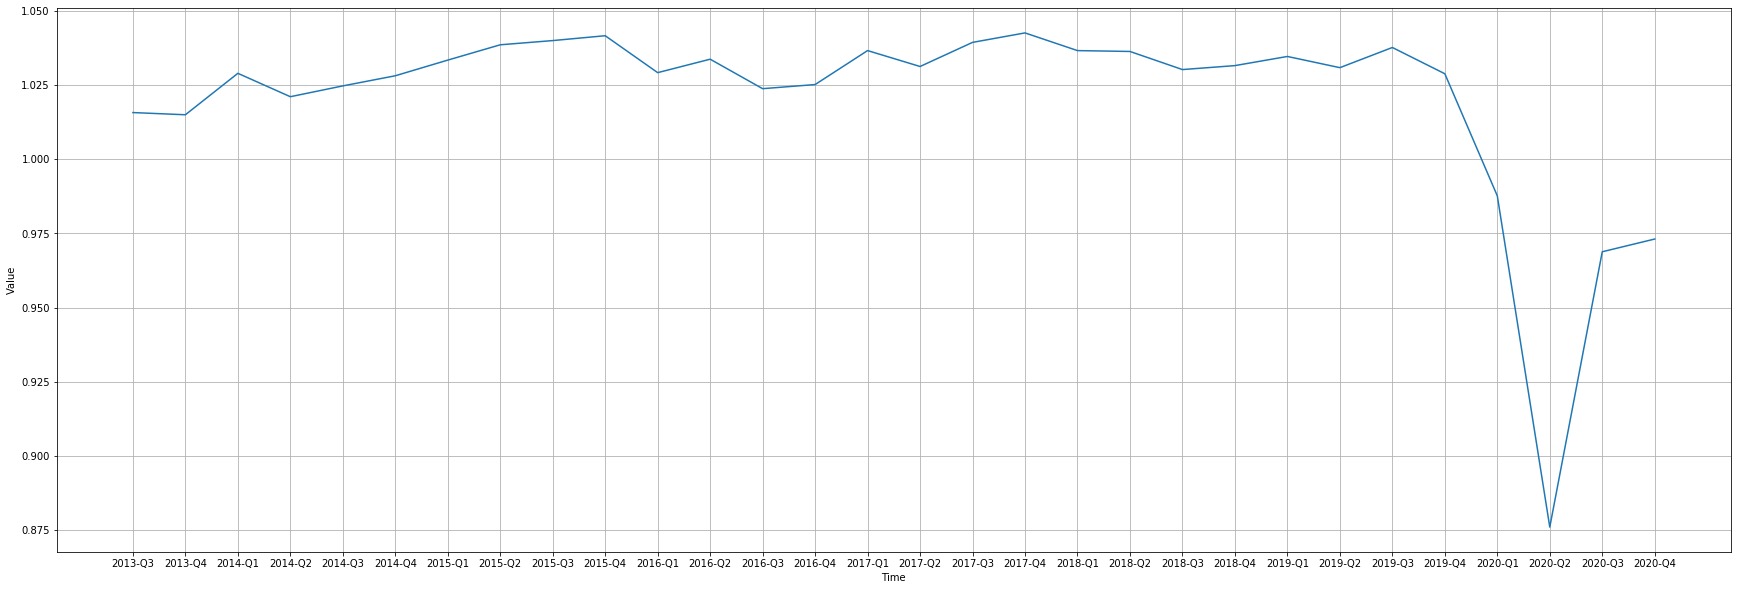

In [22]:
#plot 
plt.figure(figsize=(30, 10))
plot_series(df2["TIME"], df2["GDP_EUR"],start=70, end=100)

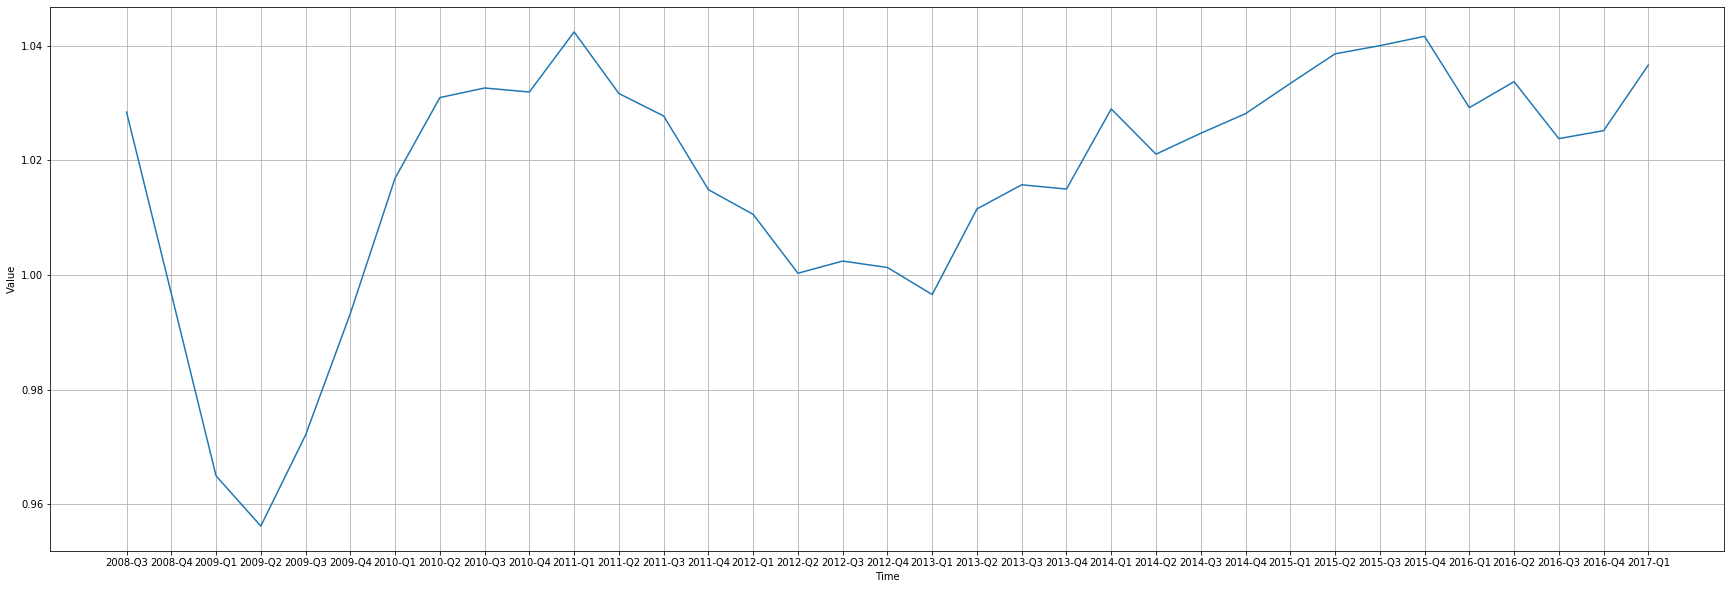

In [23]:
#plot 
plt.figure(figsize=(30, 10))
plot_series(df2["TIME"], df2["GDP_EUR"],start=50, end=85)

In [24]:
df2.to_pickle(r"C:\Users\busco\OneDrive\Documenti\Python Scripts\Repo_tassi_dec\Progetto_Studio\Data\DF_PKL\gdp_eur_df.pkl")